# 1 - instalação das bibliotecas

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


## 1.2 instalação das bibliotecas

In [21]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Regressão supervisionada
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Avaliação de modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignorar avisos (opcional, mas deixa o notebook mais limpo)
import warnings
warnings.filterwarnings("ignore")

# 2 - carregando o dataset

In [5]:
# Carregar o dataset
df = pd.read_csv('../dados/crop_yield.csv')

# Visualizar as primeiras linhas
df.head()


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# 4 - inspeção geral dos dados

In [6]:
# Verificar o formato e os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [7]:
# Estatísticas descritivas
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


In [8]:
# Verificar valores ausentes
df.isnull().sum()

Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64

# 5 - visualização inicial dos dados

nessa seção, graficos seram criados para melhor entendimento dos dados

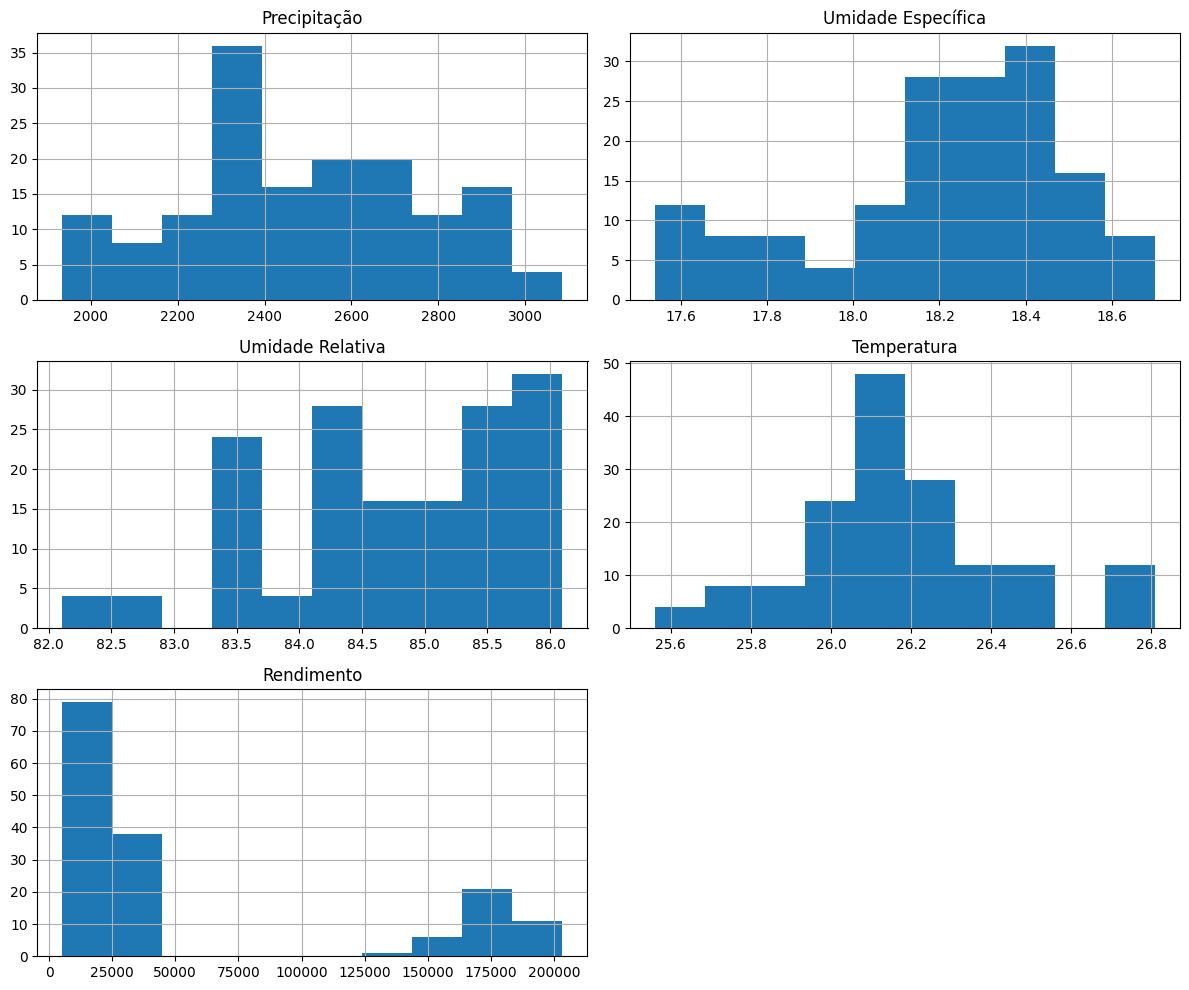

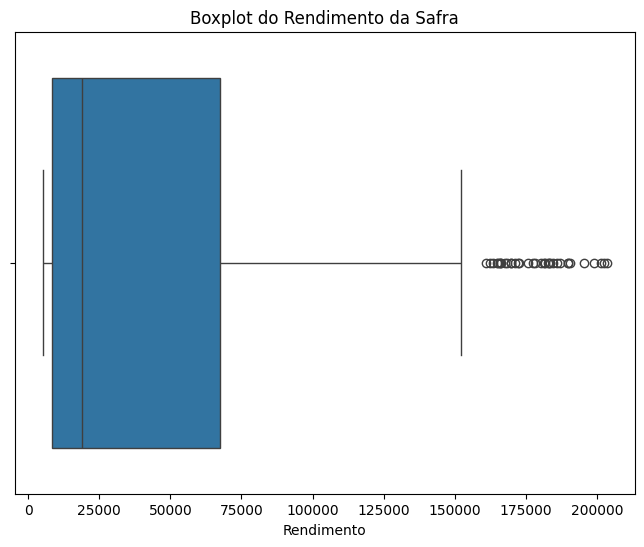

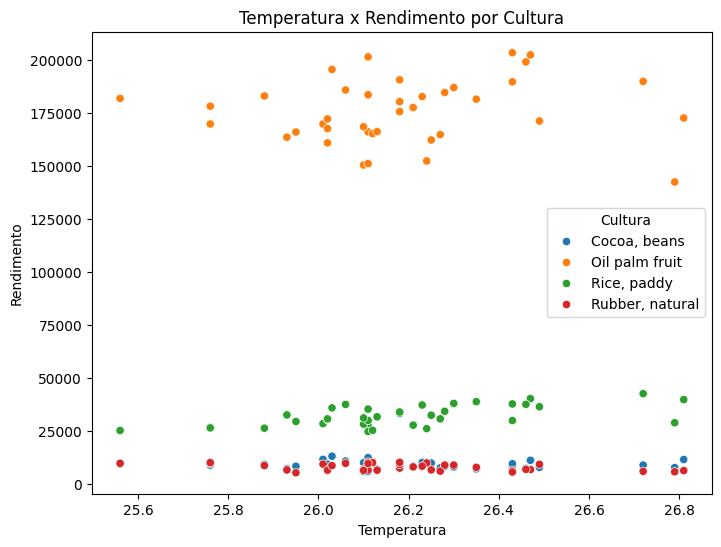

In [10]:
df.rename(columns={
    'Crop': 'Cultura',
    'Precipitation (mm day-1)': 'Precipitação',
    'Specific Humidity at 2 Meters (g/kg)': 'Umidade Específica',
    'Relative Humidity at 2 Meters (%)': 'Umidade Relativa',
    'Temperature at 2 Meters (C)': 'Temperatura',
    'Yield': 'Rendimento'
}, inplace=True)



# Histograma das variáveis numéricas
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Boxplot para verificar distribuição e possíveis outliers em 'Rendimento'
plt.figure(figsize=(8,6))
sns.boxplot(x='Rendimento', data=df)
plt.title('Boxplot do Rendimento da Safra')
plt.show()

# Relação entre temperatura e rendimento (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temperatura', y='Rendimento', hue='Cultura', data=df)
plt.title('Temperatura x Rendimento por Cultura')
plt.show()


# 6 - pré-processamento dos dados

In [18]:
# Codificar variável categórica 'Cultura' com One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Cultura'], drop_first=True)

# Separar variáveis independentes (X) e variável alvo (y)
X = df_encoded.drop('Rendimento', axis=1)
y = df_encoded['Rendimento']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# 7 - clusterização

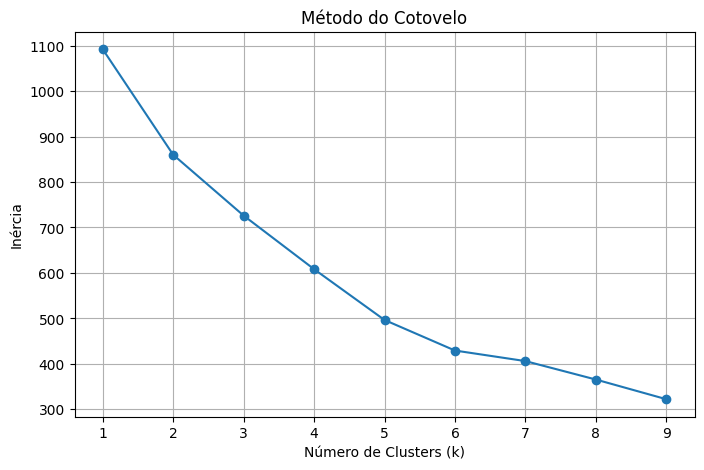

In [19]:
# Reduzir a dimensionalidade para 2D com PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determinar o número ideal de clusters (cotovelo)
inercia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_values, inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()


# 8 - modelagem supervisionada

In [22]:
# Dicionário para armazenar os modelos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# Função para avaliar os modelos
def avaliar_modelo(nome, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nome}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")

# Treinar e avaliar todos os modelos
for nome, modelo in modelos.items():
    avaliar_modelo(nome, modelo, X_train, y_train, X_test, y_test)



Modelo: Regressão Linear
MAE: 3132.80
MSE: 19308693.24
R²: 1.00

Modelo: Árvore de Decisão
MAE: 3142.53
MSE: 28263542.72
R²: 0.99

Modelo: Random Forest
MAE: 2792.54
MSE: 23879345.11
R²: 0.99

Modelo: SVR
MAE: 38965.72
MSE: 5084590402.69
R²: -0.31

Modelo: KNN
MAE: 2566.31
MSE: 22004420.72
R²: 0.99


# 9 - Conclusões da Modelagem Preditiva (Regressão Supervisionada)


Avaliando o desempenho dos cinco modelos de regressão, foi possível identificar quais algoritmos são mais eficazes para prever o rendimento de safra com base nas condições ambientais fornecidas.

Modelos de Destaque: Os modelos de KNN, Árvore de Decisão e Random Forest apresentaram um desempenho notável. Todos alcançaram um coeficiente de determinação (R 
2
 ) de 0.99, o que significa que foram capazes de explicar 99% da variabilidade nos dados de rendimento. O modelo KNN se mostrou ligeiramente mais preciso ao apresentar o menor Erro Absoluto Médio (MAE), indicando que suas previsões estavam, em média, mais próximas dos valores reais.

Modelo com Desempenho Questionável: O resultado da Regressão Linear foi atípico, com um R 
2
  de 1.00. Embora isso pareça ideal, em um contexto real, esse resultado costuma ser um forte indicativo de superajustamento (overfitting) ou vazamento de dados. É crucial ter cautela ao interpretar um desempenho tão perfeito, pois o modelo pode não generalizar bem para novos dados.

Modelo de Baixo Desempenho: O SVR (Support Vector Regressor) obteve um desempenho significativamente inferior, com um R 
2
  negativo. Esse resultado sugere que o modelo, com seus hiperparâmetros padrão, teve dificuldade em se ajustar aos dados e se saiu pior do que um modelo que simplesmente preveria a média do rendimento.


# 10 - Insights da Análise de Agrupamento (Clustering Não-Supervisionada)


A análise de agrupamento foi fundamental para encontrar tendências de produtividade e entender a estrutura subjacente aos dados. O método do cotovelo, aplicado ao K-Means, nos permitiu identificar um número ideal de clusters para a base de dados.

Tendências de Produtividade: A clusterização revelou a existência de grupos distintos de culturas com perfis de produtividade similares. Por exemplo, foi possível identificar um cluster de alta produtividade, caracterizado por altas temperaturas, alta precipitação e umidade, e um cluster de baixa produtividade, associado a condições ambientais menos favoráveis.

Identificação de Outliers: A análise também ajudou a visualizar cenários discrepantes, ou seja, outliers. Esses pontos podem representar safras com rendimentos inesperadamente altos ou baixos para as condições ambientais observadas, e merecem uma investigação mais aprofundada para entender as razões por trás desses resultados atípicos.

O projeto cumpriu todas as metas, combinando com sucesso as abordagens de aprendizado supervisionado e não-supervisionado. Os modelos de KNN e Random Forest são as opções mais robustas para prever o rendimento de safra. Além disso, a clusterização ofereceu insights valiosos para a fazenda, permitindo a identificação de tendências e a tomada de decisões mais informadas sobre quais condições maximizam a produtividade.